# Nestle Stock Price Prediction 
  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('nestle.csv')

In [3]:
df.head()

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,21-April-2022,18150.00,18572.95,17772.90,18205.80,18130.183442,4590,1770,83217542.0,950.0,20.70,800.05,55.80
1,20-April-2022,18100.10,18415.00,18017.15,18313.70,18295.559071,6069,1321,111035748.0,4677.0,77.06,397.85,213.60
2,19-April-2022,18470.05,18718.00,17845.60,17943.15,18355.093320,2904,716,53303191.0,1619.0,55.75,872.40,-526.90
3,18-April-2022,18294.50,18684.50,18294.50,18549.85,18511.224599,1496,586,27692792.0,557.0,37.23,390.00,255.35
4,13-April-2022,18371.20,18549.30,18248.25,18343.90,18388.967826,1150,550,21147313.0,573.0,49.83,301.05,-27.30


In [4]:
rows, columns = df.shape
print("Number of Rows:",rows)
print("Number of Columns:",columns)

Number of Rows: 2553
Number of Columns: 13


In [5]:
df.describe()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
count,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2.553000e+03,2551.000000,2551.000000,2553.000000,2553.000000
mean,9338.023188,9429.710419,9226.855934,9324.960556,9327.503179,5521.380337,1004.099491,4.761923e+07,3264.052528,49.024461,202.854485,-13.062632
std,4940.554627,4986.783271,4878.971233,4932.776537,4929.373727,10416.942384,1137.547557,8.502888e+07,8652.860793,19.119739,174.985173,157.849187
min,3970.000000,3995.000000,3930.000000,3942.450000,3936.768632,39.000000,6.000000,1.721420e+05,33.000000,1.270000,17.000000,-1381.300000
25%,5391.000000,5445.000000,5327.200000,5383.500000,5385.347807,1572.000000,442.000000,1.172133e+07,653.500000,35.575000,88.850000,-71.700000
50%,6804.000000,6868.900000,6747.300000,6809.950000,6813.150538,2618.000000,731.000000,2.222074e+07,1123.000000,46.870000,152.100000,-12.750000
75%,13299.950000,13690.950000,12850.000000,13455.450000,13387.505382,4981.000000,1199.000000,4.938465e+07,2225.500000,59.130000,263.150000,48.300000
max,20452.000000,20599.950000,20243.800000,20439.450000,20417.372402,154684.000000,20964.000000,2.155655e+09,152993.000000,98.930000,1950.000000,1523.300000


Maximum opening price: Rs. 20452 and minimum : 3970.

Maximum Closing Price : Rs 20439.45 and Minimum price : Rs 3942.45. 

The Maximum Weighted Average Price : Rs 20417.37 and Minimum : Rs 3936.76.

The highest price : Rs 20599.95 and lowest : Rs 3995.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2553 entries, 0 to 2552
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       2553 non-null   object 
 1   Open Price                 2553 non-null   float64
 2   High Price                 2553 non-null   float64
 3   Low Price                  2553 non-null   float64
 4   Close Price                2553 non-null   float64
 5   WAP                        2553 non-null   float64
 6   No.of Shares               2553 non-null   int64  
 7   No. of Trades              2553 non-null   int64  
 8   Total Turnover (Rs.)       2553 non-null   float64
 9   Deliverable Quantity       2551 non-null   float64
 10  % Deli. Qty to Traded Qty  2551 non-null   float64
 11  Spread High-Low            2553 non-null   float64
 12  Spread Close-Open          2553 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage

In [7]:
df.corr()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
Open Price,1.000000,0.999722,0.999701,0.999490,0.999693,-0.076134,0.155587,0.191480,-0.093000,-0.246738,0.616536,-0.065212
High Price,0.999722,1.000000,0.999610,0.999793,0.999879,-0.073740,0.162156,0.194465,-0.092403,-0.248603,0.627006,-0.047052
Low Price,0.999701,0.999610,1.000000,0.999761,0.999858,-0.078191,0.150214,0.188937,-0.093886,-0.245208,0.604996,-0.047372
Close Price,0.999490,0.999793,0.999761,1.000000,0.999927,-0.075764,0.156813,0.191751,-0.093174,-0.246861,0.616866,-0.033314
WAP,0.999693,0.999879,0.999858,0.999927,1.000000,-0.075620,0.156683,0.191979,-0.093045,-0.247219,0.616620,-0.041972
No.of Shares,-0.076134,-0.073740,-0.078191,-0.075764,-0.075620,1.000000,0.452116,0.856353,0.868194,0.279279,0.078676,0.015336
No. of Trades,0.155587,0.162156,0.150214,0.156813,0.156683,0.452116,1.000000,0.464951,0.103851,-0.188500,0.432884,0.030636
Total Turnover (Rs.),0.191480,0.194465,0.188937,0.191751,0.191979,0.856353,0.464951,1.000000,0.655851,0.192031,0.273972,-0.000969
Deliverable Quantity,-0.093000,-0.092403,-0.093886,-0.093174,-0.093045,0.868194,0.103851,0.655851,1.000000,0.488715,-0.015550,-0.000877
% Deli. Qty to Traded Qty,-0.246738,-0.248603,-0.245208,-0.246861,-0.247219,0.279279,-0.188500,0.192031,0.488715,1.000000,-0.247729,0.008249


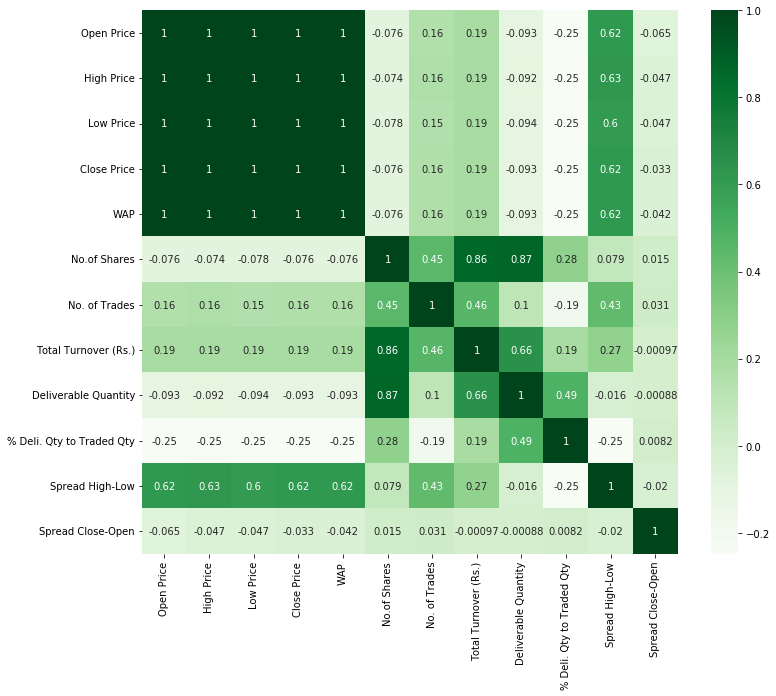

In [8]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,linecolor='blue',cmap='Greens')

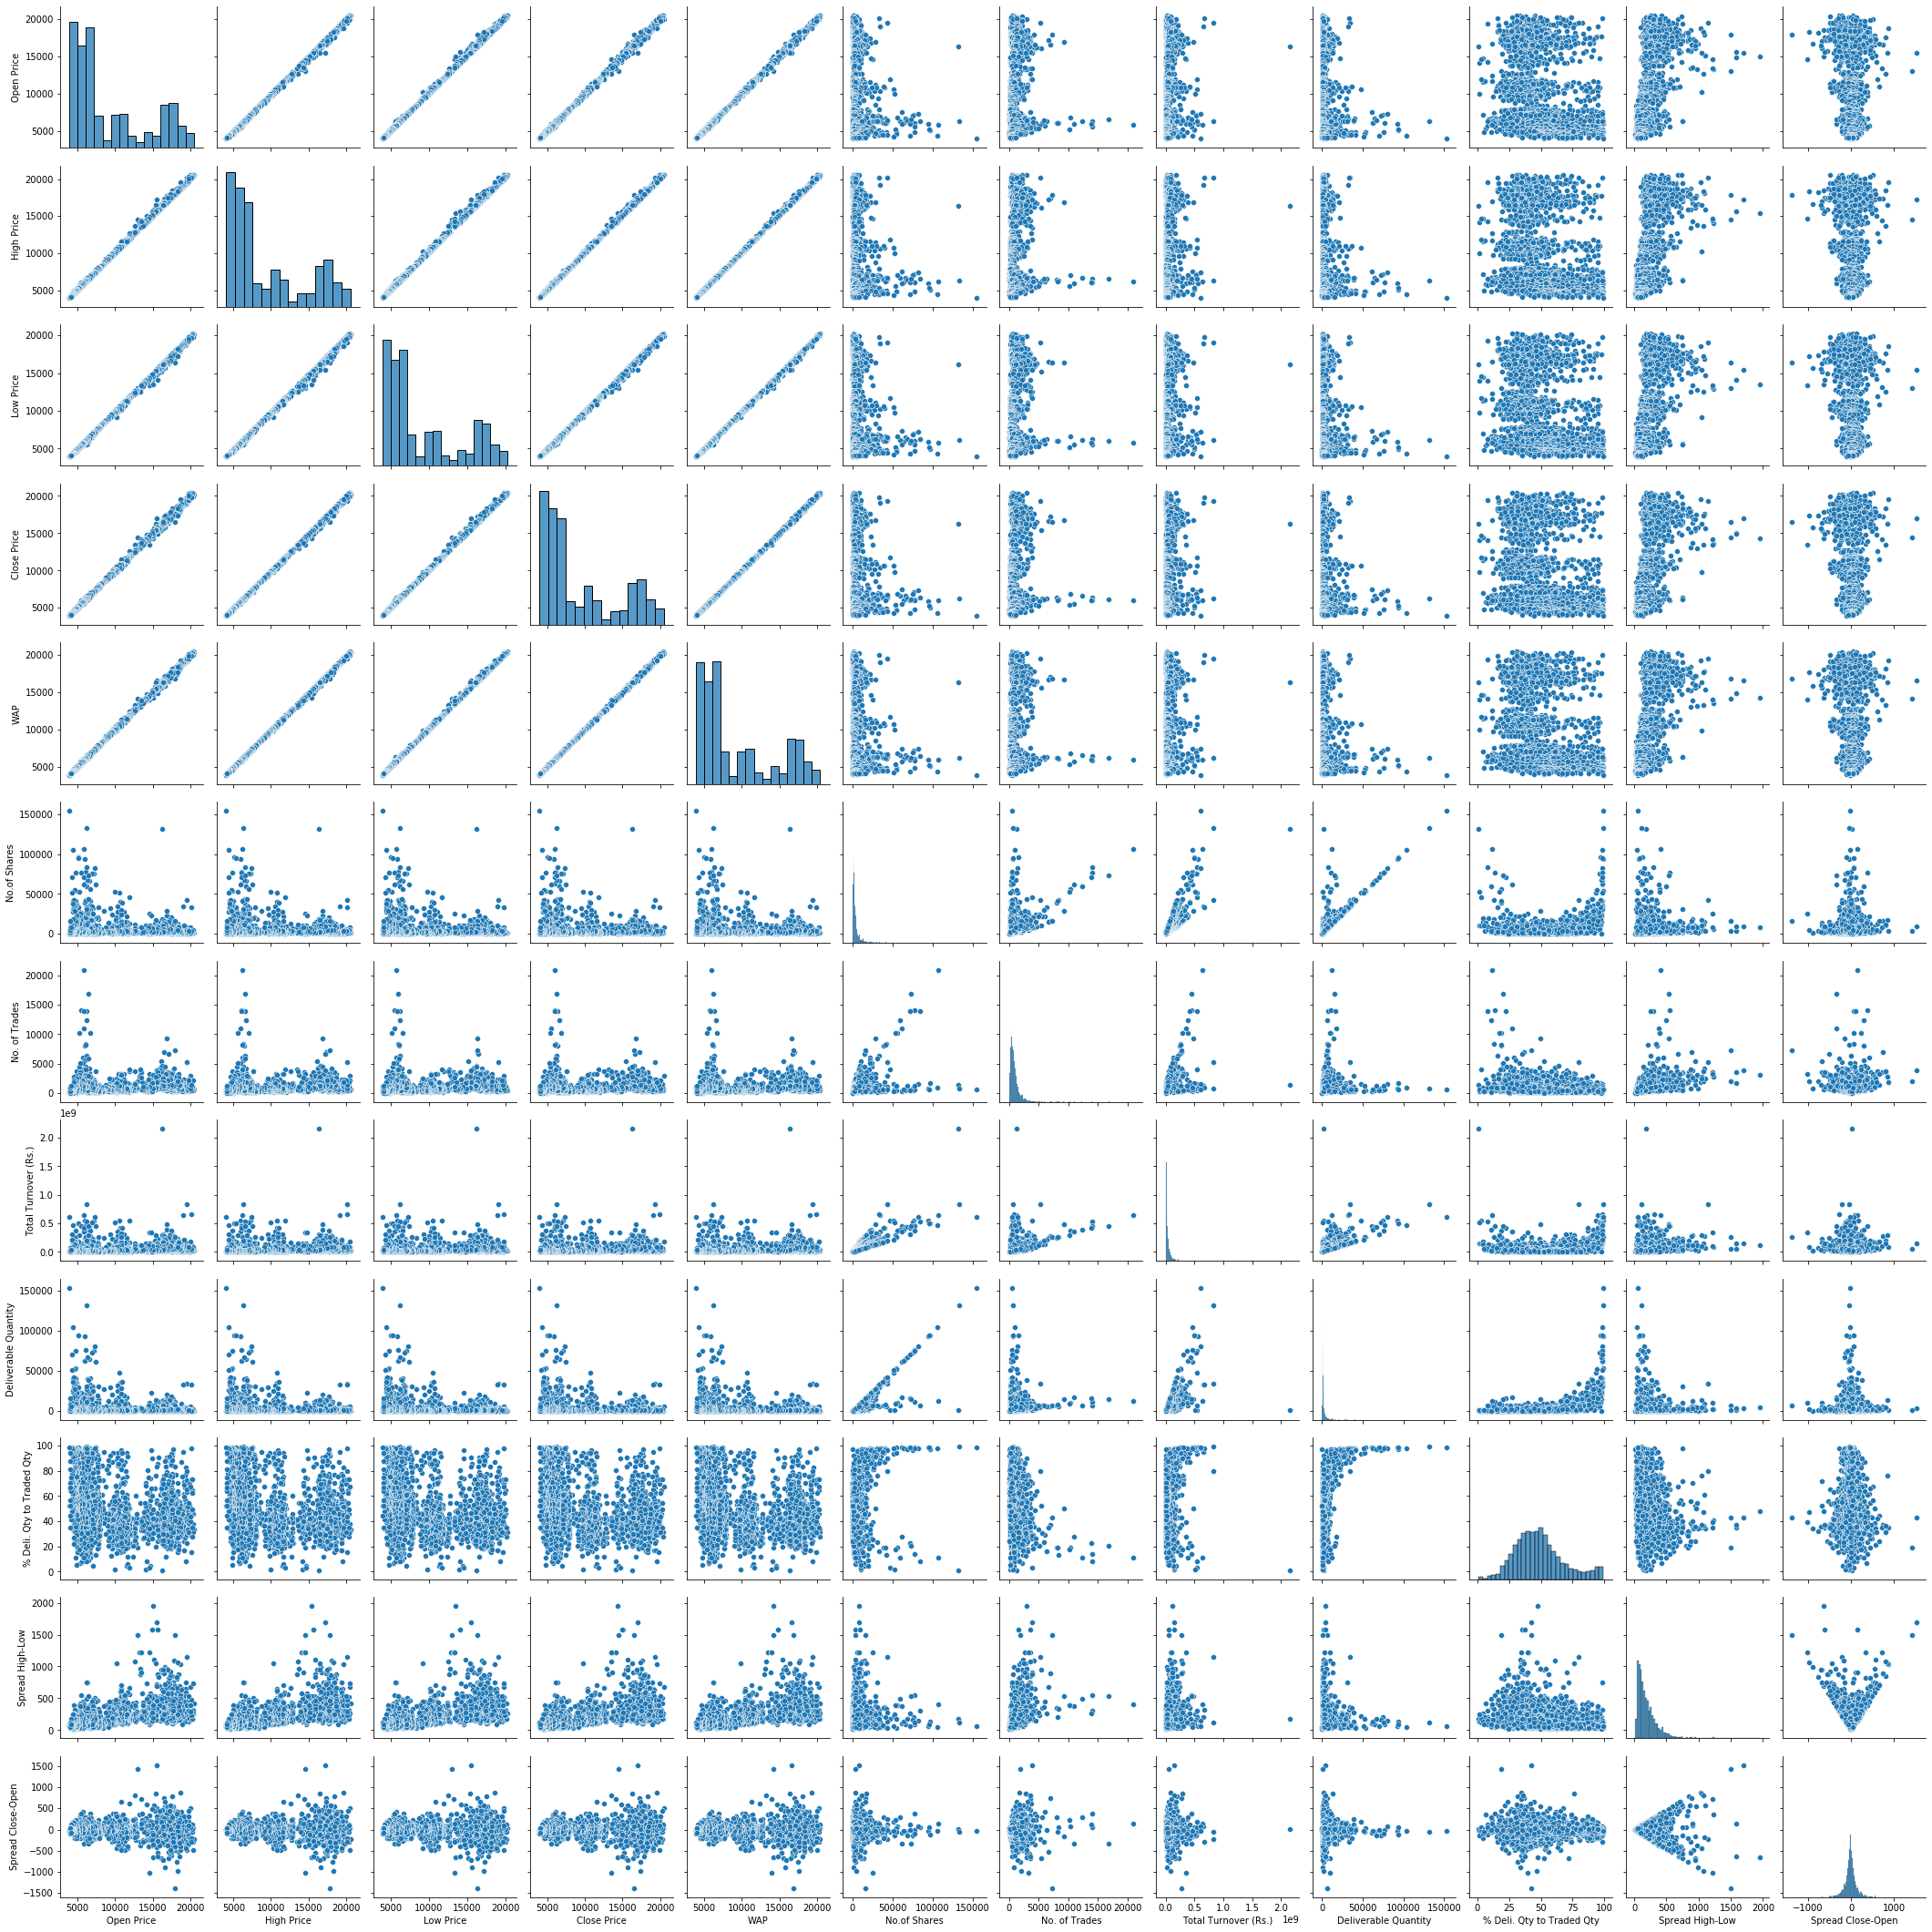

In [9]:
sns.pairplot(data=df);

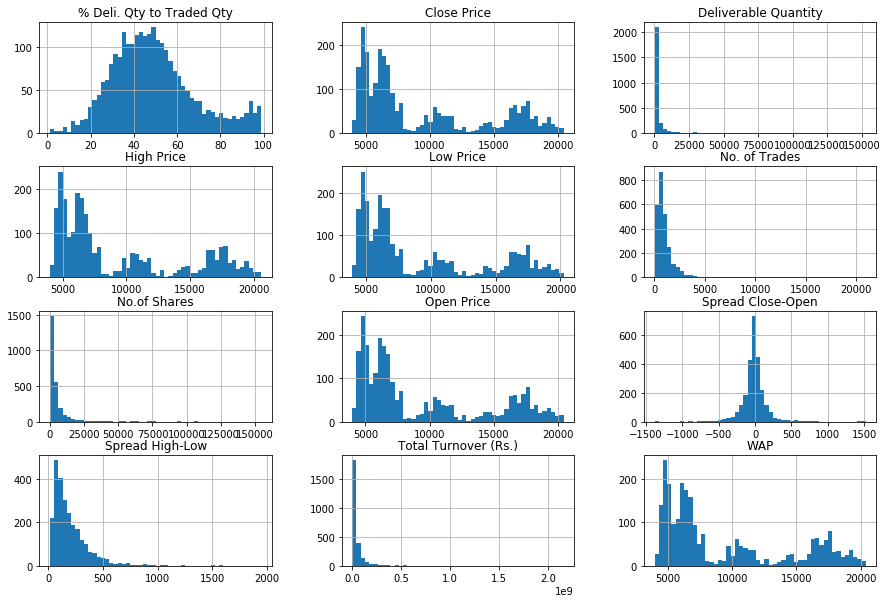

In [10]:
df.hist(bins=50,figsize=(15,10));

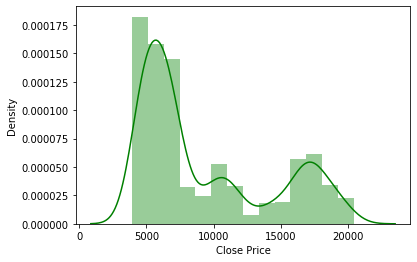

In [11]:
sns.distplot(df['Close Price'],hist=True,color='Green');

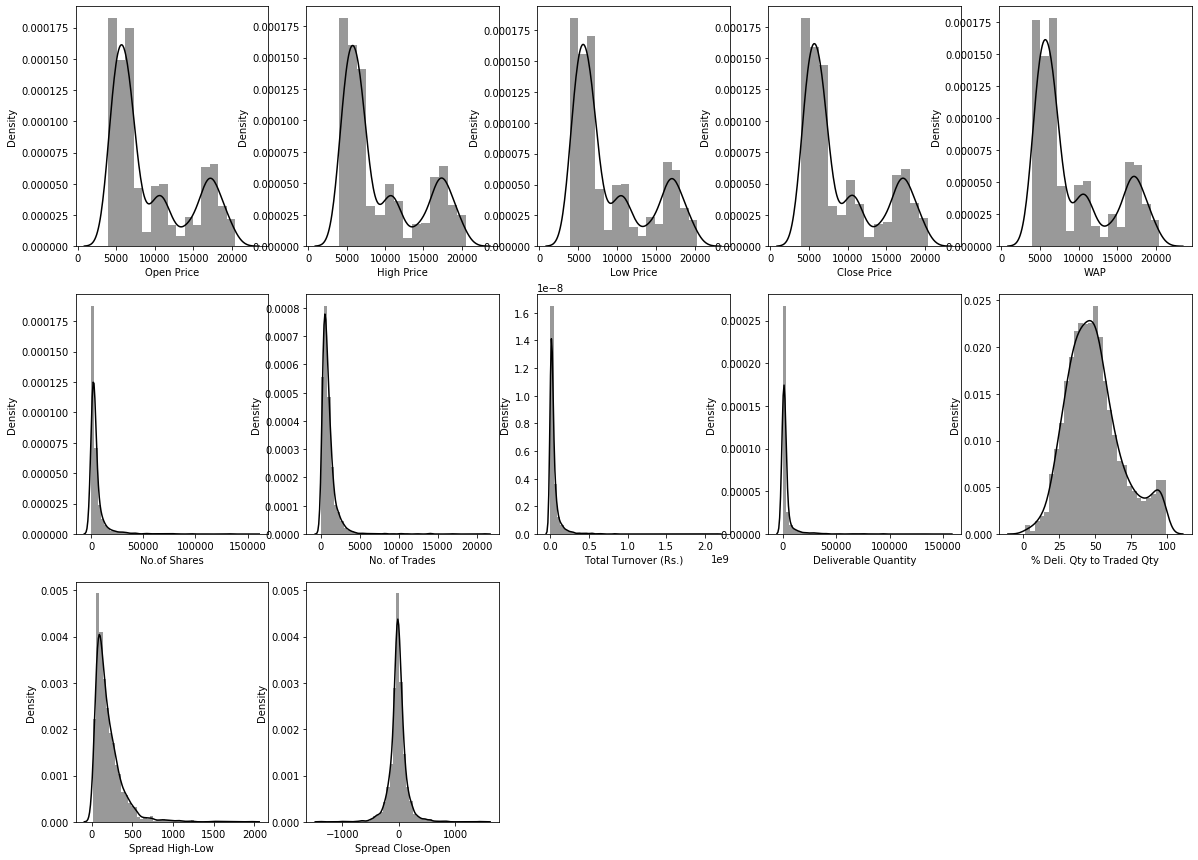

In [12]:
num_col=[col for col in df.columns if df[col].dtype != 'object']
plt.figure(figsize = (20, 15))
plotnumber = 1
for column in num_col:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column],color='black');
        plt.xlabel(column)
    
        
    plotnumber += 1

In [13]:
df.isnull().sum()

Date                         0
Open Price                   0
High Price                   0
Low Price                    0
Close Price                  0
WAP                          0
No.of Shares                 0
No. of Trades                0
Total Turnover (Rs.)         0
Deliverable Quantity         2
% Deli. Qty to Traded Qty    2
Spread High-Low              0
Spread Close-Open            0
dtype: int64

Ignoring the missing values as only 2 values are missing from 2 columns.

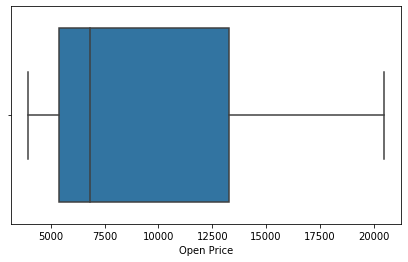

In [14]:
plt.figure(figsize=(7,4))
sns.boxplot(x='Open Price',data=df,orient='h');

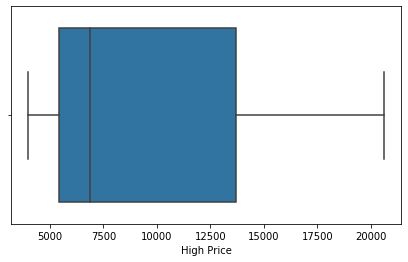

In [15]:
plt.figure(figsize=(7,4))
sns.boxplot(x='High Price',data=df,orient='h');

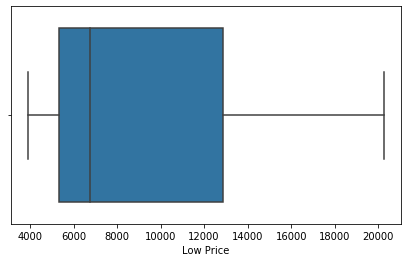

In [16]:
plt.figure(figsize=(7,4))
sns.boxplot(x='Low Price',data=df,orient='h');

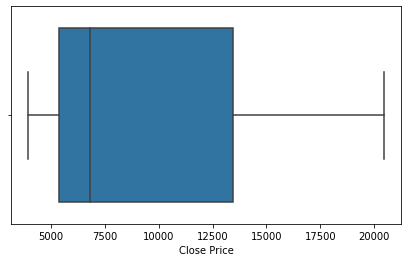

In [17]:
plt.figure(figsize=(7,4))
sns.boxplot(x='Close Price',data=df,orient='h');

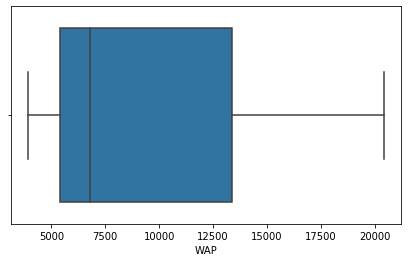

In [18]:
plt.figure(figsize=(7,4))
sns.boxplot(x='WAP',data=df,orient='h');

In [19]:
df['Date'] = pd.to_datetime(df['Date'])

In [20]:
df['Day']=df['Date'].dt.weekday
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year

In [21]:
df.drop('Date',axis=1,inplace=True)

In [22]:
df['Day'].value_counts()

1    513
2    512
3    509
0    509
4    498
5      9
6      3
Name: Day, dtype: int64

In [23]:
df.head(15)

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,Day,Month,Year
0,18150.00,18572.95,17772.90,18205.80,18130.183442,4590,1770,83217542.0,950.0,20.70,800.05,55.80,3,4,2022
1,18100.10,18415.00,18017.15,18313.70,18295.559071,6069,1321,111035748.0,4677.0,77.06,397.85,213.60,2,4,2022
2,18470.05,18718.00,17845.60,17943.15,18355.093320,2904,716,53303191.0,1619.0,55.75,872.40,-526.90,1,4,2022
3,18294.50,18684.50,18294.50,18549.85,18511.224599,1496,586,27692792.0,557.0,37.23,390.00,255.35,0,4,2022
4,18371.20,18549.30,18248.25,18343.90,18388.967826,1150,550,21147313.0,573.0,49.83,301.05,-27.30,2,4,2022
5,18339.00,18497.00,18216.30,18430.00,18390.222000,2000,537,36780444.0,1412.0,70.60,280.70,91.00,1,4,2022
6,18499.00,18518.35,18225.00,18422.70,18385.862360,712,364,13090734.0,305.0,42.84,293.35,-76.30,0,4,2022
7,18180.00,18500.00,18101.00,18431.10,18361.677527,1197,514,21978928.0,534.0,44.61,399.00,251.10,4,4,2022
8,18198.60,18245.95,17986.75,18175.55,18131.799564,918,357,16644992.0,240.0,26.14,259.20,-23.05,3,4,2022
9,17900.00,18255.35,17871.20,18207.60,18096.243542,813,397,14712246.0,341.0,41.94,384.15,307.60,2,4,2022


In [25]:
days = {1:'Tuesday',0:'Monday',3:'Thursday',2:'Wednesday',4: 'Friday',5:'Saturday',6:'Sunday'}
df['Day'] = df['Day'].map(days)

In [26]:
yw=df.groupby('Year')['No. of Trades'].sum()
yw

Year
2012    128129
2013    181198
2014    227595
2015    464161
2016    228811
2017    144073
2018    177668
2019    193401
2020    457517
2021    296816
2022     64097
Name: No. of Trades, dtype: int64

Text(0.5, 1.0, 'no. of trades')

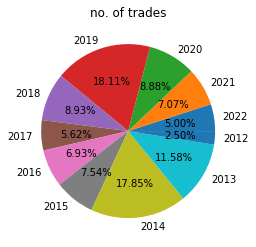

In [27]:
plt.pie(yw,labels=df['Year'].unique(),autopct='%1.2f%%');
plt.title('no. of trades')

In [28]:
dw = df.groupby('Day')['No. of Trades'].sum().reset_index()
dw.head(10)

,Day,No. of Trades
0,Friday,528457
1,Monday,484210
2,Saturday,2011
3,Sunday,933
4,Thursday,519870
5,Tuesday,490994
6,Wednesday,536991


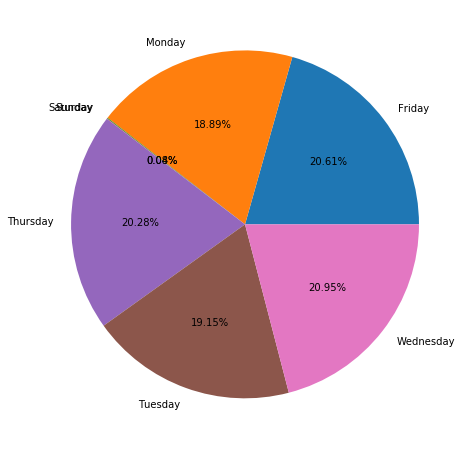

In [29]:
plt.figure(figsize=(10,8))
plt.pie(dw['No. of Trades'],labels= dw['Day'],autopct='%1.2f%%');

In [30]:
dw = df.groupby('Day')['High Price'].sum().reset_index()
dw.head(10)

,Day,High Price
0,Friday,4671316.70
1,Monday,4801443.15
2,Saturday,67300.55
3,Sunday,27766.95
4,Thursday,4823236.60
5,Tuesday,4842013.20
6,Wednesday,4840973.55


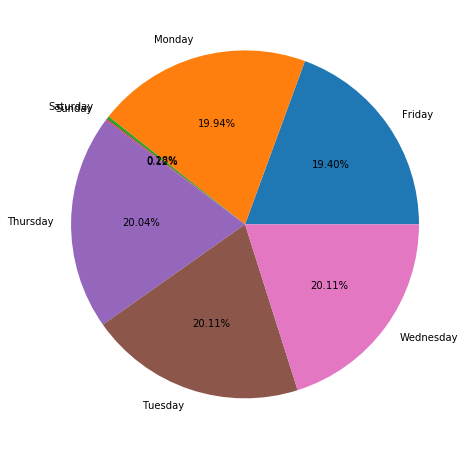

In [31]:
plt.figure(figsize=(10,8))
plt.pie(dw['High Price'],labels= dw['Day'],autopct='%1.2f%%');

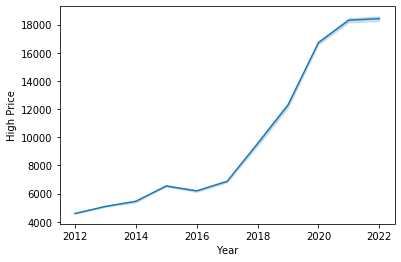

In [32]:
sns.lineplot(data=df, x="Year", y="High Price");

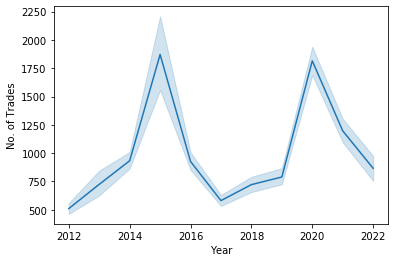

In [33]:
sns.lineplot(data=df, x="Year", y="No. of Trades");

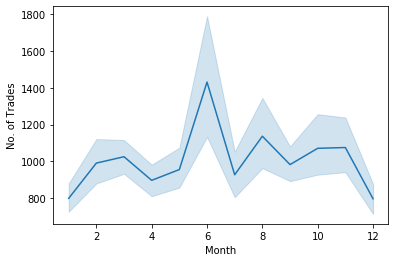

In [34]:
sns.lineplot(data=df,x='Month',y='No. of Trades');

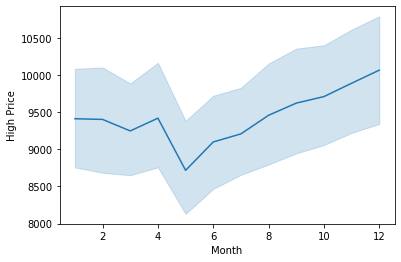

In [35]:
sns.lineplot(data=df,x='Month',y='High Price');

**OBSERVATIONS**


*   Maximum number of trades takes place on Wednesday , Friday and Thursday. 

-   Usually the stock is at high price on Wednesday , Tuesday and Thursdays. 


**Simple Linear Regression**

### Feature Selection 

In [36]:
df.columns

Index(['Open Price', 'High Price', 'Low Price', 'Close Price', 'WAP',
       'No.of Shares', 'No. of Trades', 'Total Turnover (Rs.)',
       'Deliverable Quantity', '% Deli. Qty to Traded Qty', 'Spread High-Low',
       'Spread Close-Open', 'Day', 'Month', 'Year'],
      dtype='object')

In [37]:
df.drop(['No.of Shares', 'No. of Trades', 'Total Turnover (Rs.)',
       'Deliverable Quantity', '% Deli. Qty to Traded Qty', 'Spread High-Low',
       'Spread Close-Open', 'Day', 'Month', 'Year'],axis=1,inplace=True)

In [38]:
X=df[['WAP']]
y=df['Close Price']

**Applying Algorithm**

In [39]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lr=LinearRegression()

In [44]:
lr.fit(X_train,y_train)

LinearRegression()

In [45]:
lr.score(X_train,y_train)

0.9998572935940231

In [46]:
lr.score(X_test,y_test)

0.9998365410513401

### Best Fit Line

In [47]:
lr.coef_

array([1.00045917])

In [48]:
lr.intercept_

-7.890221724752337

Text(0, 0.5, 'Close Price')

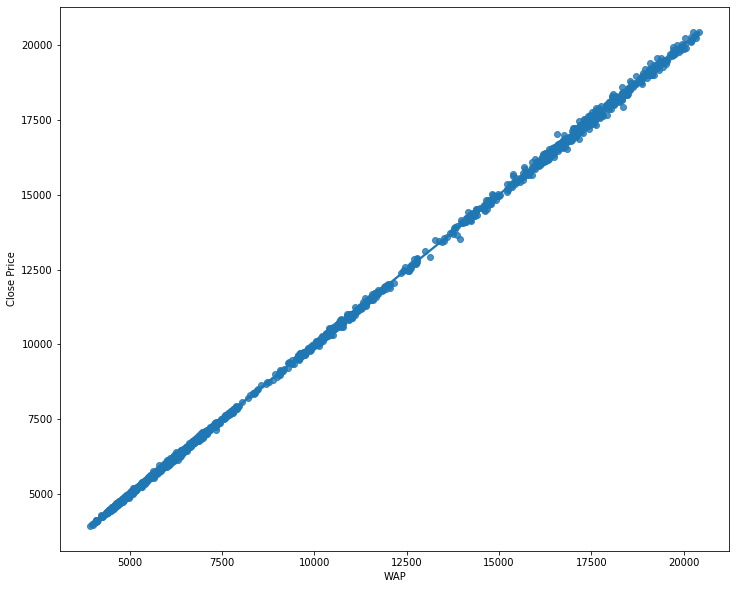

In [49]:
plt.figure(figsize=(12,10));
sns.regplot(X, y);
plt.xlabel('WAP')
plt.ylabel("Close Price")

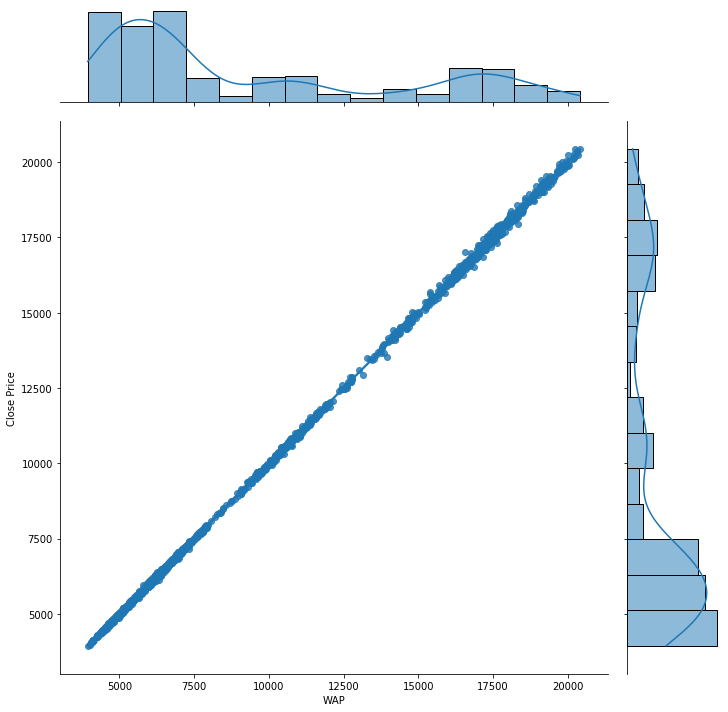

In [50]:
sns.jointplot(x='WAP', y='Close Price', data=df, kind='reg', size=10);

### Performace Measures

In [51]:
y_pred = lr.predict(X_test)

In [52]:
from sklearn import metrics
print("R score",metrics.r2_score(y_test,y_pred))
print("MSE = ", metrics.mean_squared_error(y_test,y_pred))

R score 0.9998365410513401
MSE =  3821.9935122412203


**COMPARING ACTUAL AND PREDICTED VALUES**

In [53]:
lr_diff=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred})

In [54]:
lr_diff.head(5)

,Actual Value,Predicted Value
249,17086.25,17111.878458
63,19328.80,19360.946506
1770,7045.10,7042.596232
1835,6317.25,6278.206706
2428,4509.75,4502.130628


In [55]:
lr_diff.tail()

,Actual Value,Predicted Value
478,16288.65,16368.388952
889,10341.50,10419.638570
2062,5043.20,5039.600519
1506,5199.60,5096.897822
537,16775.95,16739.818933


In [56]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, X_train, y_train, scoring='r2', cv=5)
scores  

array([0.99984708, 0.99986014, 0.99988188, 0.99984267, 0.99985233])

In [57]:
accuracy_fold=np.mean(abs(scores))
accuracy_fold

0.9998568224000902

### Applying the Multiple Regression Algorithm

In [58]:
X=df.drop('Close Price',axis=1)
y=df['Close Price']

In [59]:
X.shape

(2553, 4)

In [60]:
y.shape

(2553,)

### Standardisation

In [61]:
from sklearn.preprocessing import StandardScaler
# define StandScaler scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(X)

In [62]:
X_train,X_test,y_train,y_test = train_test_split(scaled,y,test_size=0.2,random_state=42)

lr = LinearRegression().fit(X_train, y_train)
y_pred=lr.predict(X_test)

In [63]:
lr.score(X_train, y_train)

0.9998900472039419

In [64]:
lr.score(X_test, y_test)

0.9998729181379519

**COMPARING ACTUAL AND PREDICTED VALUES**

In [65]:
lr_diff=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred})

In [66]:
lr_diff.head()

,Actual Value,Predicted Value
1949,4812.95,4814.966674
637,13945.10,13955.371596
2150,5101.50,5101.681874
393,16098.90,16024.177325
1023,7850.55,7863.032807


In [67]:
lr_diff.tail()

,Actual Value,Predicted Value
2460,4627.45,4600.398313
1196,6767.35,6702.794247
361,16995.60,17039.038089
2104,5285.00,5319.732444
2147,5103.15,5081.927856


### Performace Measures.

In [68]:
y_pred = lr.predict(X_test)

In [69]:
print("R score",metrics.r2_score(y_test,y_pred))
print("MSE = ", metrics.mean_squared_error(y_test,y_pred))

R score 0.9998729181379519
MSE =  3109.177867698725


## Conclusion 

*   1) For Simple Linear Regression -
            99% accuracy for both training as well as testing set.
            R score = 0.99 and MSE =  3821.99
*   2) Multiple Linear Regression -  
            99% accuracy 
            R score = 0.99 and  MSE = 3109.17